## This code runs the Cluster Centroid Analysis and generates the LIWC figures on top of the clusters

### Import Libraries

In [1]:
# CHUNK 1 — Imports
import pandas as pd
import matplotlib.pyplot as plt

### Load the CSV (same folder) + basic sniff checks

In [2]:
# CHUNK 2 — Load data (no path; file must be in the same folder)
fname = "LIWC-22 Results - real_world_worry_waves_dataset___ - LIWC Analysis.csv"
df = pd.read_csv(fname)

# Sanity checks
assert "Cluster Numbers" in df.columns, "Missing 'Cluster Numbers' column."

needed = ["Analytic", "Clout", "Authentic", "Tone"]
missing = [c for c in needed if c not in df.columns]
assert not missing, f"Missing expected LIWC columns: {missing}"

print("Loaded:", df.shape, "rows x cols")


Loaded: (1152, 309) rows x cols


### Compute Means over Clusters

In [3]:
# CHUNK 3 — Aggregate per cluster
key_vars = ["Analytic", "Clout", "Authentic", "Tone"]

cluster_means = (
    df.groupby("Cluster Numbers")[key_vars]
      .mean()
      .round(2)
      .sort_index()
)

print(cluster_means)

                 Analytic  Clout  Authentic   Tone
Cluster Numbers                                   
0                   44.80  43.13      61.22  29.01
1                   48.12  52.74      66.56  45.42
2                   46.24  43.45      63.40  46.51
3                   42.68  42.62      55.34  28.02
4                   43.01  47.18      59.55  36.38


### Make bar charts over clusters

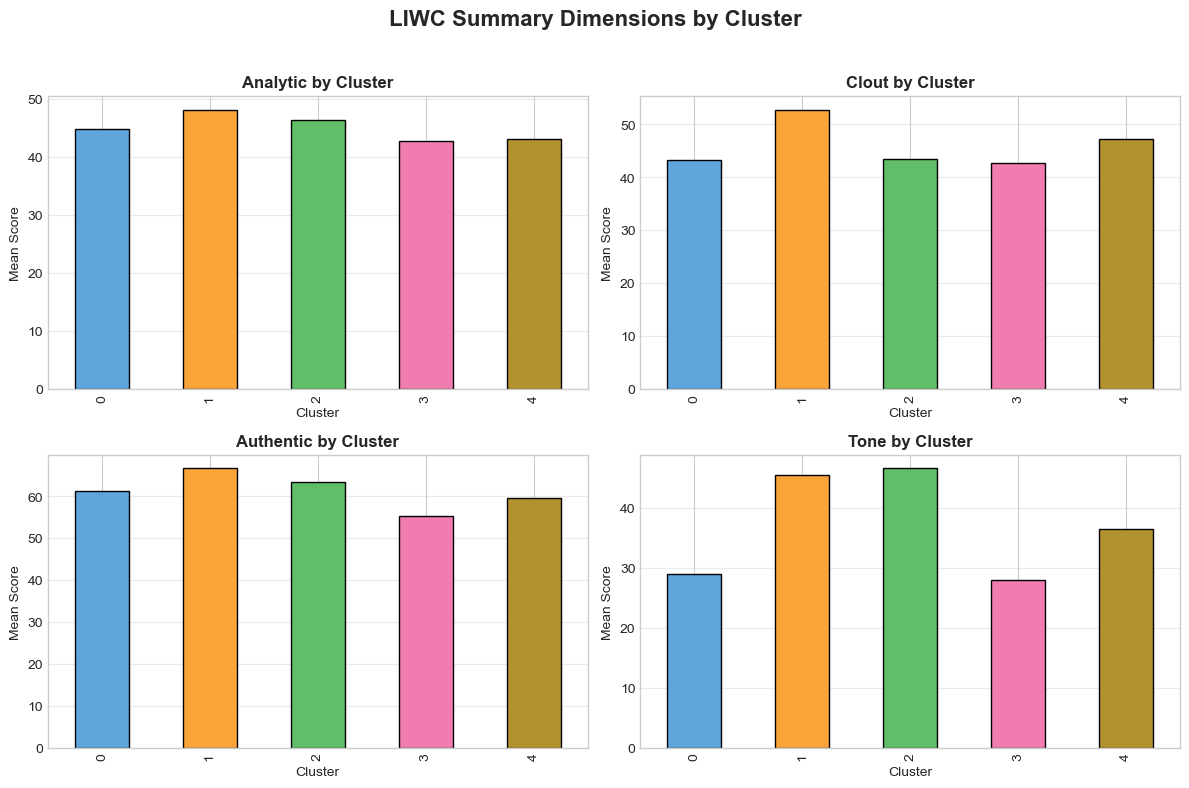

In [5]:
# CHUNK 4 — Nicer styled plots
plt.style.use("seaborn-v0_8-whitegrid")

colors = ["#5DA5DA", "#FAA43A", "#60BD68", "#F17CB0", "#B2912F"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

titles = ["Analytic by Cluster", "Clout by Cluster",
          "Authentic by Cluster", "Tone by Cluster"]

for ax, var, title in zip(axes, key_vars, titles):
    cluster_means[var].plot(kind="bar", ax=ax, color=colors, edgecolor="black")
    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.set_xlabel("Cluster")
    ax.set_ylabel("Mean Score")
    ax.grid(axis="y", alpha=0.4)

fig.suptitle("LIWC Summary Dimensions by Cluster", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Yes I know I do not have to read the file again, but I want to start fresh for my cluster centroid grouping. What I did was group questions into categories. I was initially going to use emotions, but the scales of positive and negative  would mean that high scores on negative emotions like fear and sadness would not gel well  with high scores on say happiness.  So I used the list below:
$${\bf Negative Emotion Index}$$

worry_wave1

anger_wave1

disgust_wave1

fear_wave1

anxiety_wave1

sadness_wave1

$${\bf Positive Emotion Index}$$

happiness_wave1

relaxation_wave1

desire_wave1 

$${\bf Self-Expression / Ratings}

self_rating_general_wave1

self_rating_short_wave1

self_rating_long_wave1

$${\bf Social Media Use}$$

twitter_general_often_wave1

twitter_tweet_often_wave1

twitter_participate_often_wave1

In [10]:
# CHUNK 5 — Define item groups

import pandas as pd

# Read your file (same folder)
fname = "LIWC-22 Results - real_world_worry_waves_dataset___ - LIWC Analysis.csv"
df = pd.read_csv(fname)

# Negative emotion items (higher = more distress)
neg_emotion_cols = [
    "worry_wave1", "anger_wave1", "disgust_wave1",
    "fear_wave1", "anxiety_wave1", "sadness_wave1"
]

# Positive emotion items (higher = more wellbeing)
pos_emotion_cols = [
    "happiness_wave1", "relaxation_wave1", "desire_wave1"
]

# Self-expression (adjust these names if your dataset differs)
self_expr_cols = [
    "self_rating_general_wave1",
    "self_rating_short_wave1",
    "self_rating_long_wave1"
]

# Social media use (Twitter examples shown—add others if present)
social_cols = [
    "twitter_general_often_wave1",
    "twitter_tweet_often_wave1",
    "twitter_participate_often_wave1"
]

# Make sure columns exist (ignore any missing gracefully)
def keep_existing(cols):
    return [c for c in cols if c in df.columns]

neg_emotion_cols = keep_existing(neg_emotion_cols)
pos_emotion_cols = keep_existing(pos_emotion_cols)
self_expr_cols   = keep_existing(self_expr_cols)
social_cols      = keep_existing(social_cols)

print("Negative emotion cols:", neg_emotion_cols)
print("Positive emotion cols:", pos_emotion_cols)
print("Self-expression cols:", self_expr_cols)
print("Social media cols:", social_cols)


Negative emotion cols: ['worry_wave1', 'anger_wave1', 'disgust_wave1', 'fear_wave1', 'anxiety_wave1', 'sadness_wave1']
Positive emotion cols: ['happiness_wave1', 'relaxation_wave1', 'desire_wave1']
Self-expression cols: ['self_rating_general_wave1', 'self_rating_short_wave1', 'self_rating_long_wave1']
Social media cols: ['twitter_general_often_wave1', 'twitter_tweet_often_wave1', 'twitter_participate_often_wave1']


### Build index means

In [13]:
# Build indices as row-wise means (skip NaNs). Uses your lists:
def rowmean(cols):
    return df[cols].mean(axis=1, skipna=True) if cols else pd.Series([pd.NA]*len(df), index=df.index)

df["NEG_EMOTION_IDX"] = rowmean(neg_emotion_cols)
df["POS_EMOTION_IDX"] = rowmean(pos_emotion_cols)
df["SELF_EXPR_IDX"]   = rowmean(self_expr_cols)
df["SOCIAL_IDX"]      = rowmean(social_cols)

#(Optional) quick check
print(df[["NEG_EMOTION_IDX","POS_EMOTION_IDX","SELF_EXPR_IDX","SOCIAL_IDX"]].head())


   NEG_EMOTION_IDX  POS_EMOTION_IDX  SELF_EXPR_IDX  SOCIAL_IDX
0         4.166667         4.000000            8.0    7.666667
1         2.166667         5.000000            5.0    4.000000
2         2.333333         7.000000            6.0    7.666667
3         2.833333         2.333333            7.0    1.666667
4         3.000000         5.333333            6.0    2.666667


### Nice table of cluster centroids

In [14]:
# Aggregate the *index columns* (not the Python list names)
assert "Cluster Numbers" in df.columns, "Missing 'Cluster Numbers' column."

category_cols = ["NEG_EMOTION_IDX", "POS_EMOTION_IDX", "SELF_EXPR_IDX", "SOCIAL_IDX"]

centroids_by_category = (
    df.groupby("Cluster Numbers")[category_cols]
      .mean()
      .round(2)
      .sort_index()
)

print("\nCluster centroids by category:\n")
print(centroids_by_category)

# (Optional) save
centroids_by_category.to_csv("cluster_centroids_by_category.csv", index=True)



Cluster centroids by category:

                 NEG_EMOTION_IDX  POS_EMOTION_IDX  SELF_EXPR_IDX  SOCIAL_IDX
Cluster Numbers                                                             
0                           5.47             3.15           6.21        3.37
1                           4.71             4.28           7.10        4.43
2                           3.52             4.10           6.30        3.36
3                           6.30             2.82           6.74        5.20
4                           5.09             3.53           7.28        6.25


### As z-scores

In [15]:
from scipy.stats import zscore

def zrowmean(cols):
    if not cols:
        return pd.Series([pd.NA]*len(df), index=df.index)
    Z = df[cols].apply(zscore, nan_policy="omit")
    return Z.mean(axis=1, skipna=True)

df["NEG_EMOTION_IDX_Z"] = zrowmean(neg_emotion_cols)
df["POS_EMOTION_IDX_Z"] = zrowmean(pos_emotion_cols)
df["SELF_EXPR_IDX_Z"]   = zrowmean(self_expr_cols)
df["SOCIAL_IDX_Z"]      = zrowmean(social_cols)

centroids_by_category_z = (
    df.groupby("Cluster Numbers")[["NEG_EMOTION_IDX_Z","POS_EMOTION_IDX_Z","SELF_EXPR_IDX_Z","SOCIAL_IDX_Z"]]
      .mean().round(2).sort_index()
)

print("\nCluster centroids by category (z-scored):\n")
print(centroids_by_category_z)



Cluster centroids by category (z-scored):

                 NEG_EMOTION_IDX_Z  POS_EMOTION_IDX_Z  SELF_EXPR_IDX_Z  \
Cluster Numbers                                                          
0                             0.12              -0.12            -0.22   
1                            -0.22               0.47             0.25   
2                            -0.78               0.37            -0.18   
3                             0.51              -0.29             0.06   
4                            -0.05               0.08             0.34   

                 SOCIAL_IDX_Z  
Cluster Numbers                
0                       -0.44  
1                       -0.03  
2                       -0.45  
3                        0.27  
4                        0.68  


### Heatmap of z-scores

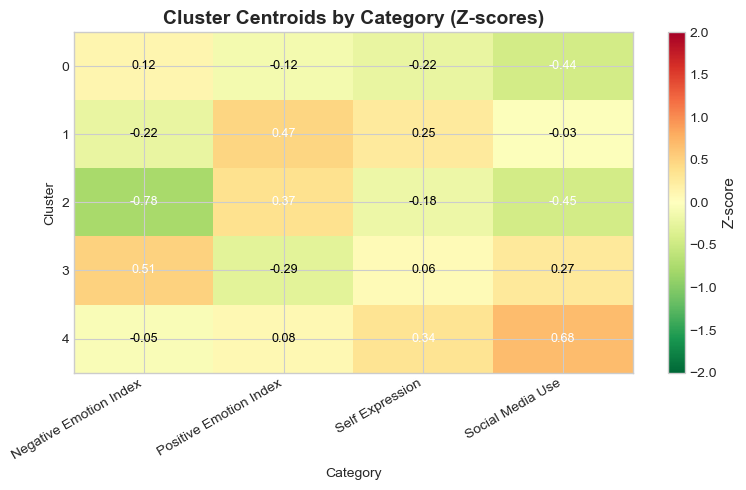

In [18]:
# CHUNK — Heatmap of cluster centroids (Z-scores) with green→red colors and custom labels

import matplotlib.pyplot as plt
import numpy as np

data = centroids_by_category_z.copy()

vals = data.values
clusters = data.index.astype(str).tolist()
labels = ["Negative Emotion Index", "Positive Emotion Index", 
          "Self Expression", "Social Media Use"]

fig, ax = plt.subplots(figsize=(8, 5))

# Green = higher (positive), Red = lower (negative)
im = ax.imshow(vals, aspect="auto", cmap="RdYlGn_r", vmin=-2, vmax=2)

ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(clusters)))
ax.set_xticklabels(labels, rotation=30, ha="right", fontsize=10)
ax.set_yticklabels(clusters, fontsize=10)
ax.set_xlabel("Category")
ax.set_ylabel("Cluster")
ax.set_title("Cluster Centroids by Category (Z-scores)", fontsize=14, fontweight="bold")

# Annotate each cell with the value
mean_abs = np.nanmean(np.abs(vals))
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        ax.text(j, i, f"{vals[i, j]:.2f}", ha="center", va="center",
                color="white" if abs(vals[i, j]) > mean_abs else "black", fontsize=9)

# Colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Z-score", fontsize=11)

plt.tight_layout()
plt.show()
